In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns # iris 데이터 가져오기1
from sklearn import datasets # iris 데이터 가져오기2
from sklearn.preprocessing import LabelEncoder #원핫인코딩1
from tensorflow.keras.utils import to_categorical #원핫인코딩2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

# 1. 기본적인 DNN

In [15]:
# 1. 데이터 생성 및 전처리
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, train_size=0.8, stratify=iris_y)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [18]:
# 2. 모델 구성
model = Sequential([
    Input(4),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=30, activation='relu'),
    Dropout(0.1),
    Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                6450      
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 30)                1530      
                                                                 
 dropout_14 (Dropout)        (None, 30)               

In [21]:
# 3. 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델학습
earlyStopping = EarlyStopping(monitor='val_loss', patience=20)
hist = model.fit(train_X, train_y, epochs=200, validation_split=0.1, callbacks=[earlyStopping], verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 53ms/step - loss: 1.3984 - accuracy: 0.3056 - val_loss: 0.9710 - val_accuracy: 0.7500
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.0630 - accuracy: 0.4352 - val_loss: 0.8962 - val_accuracy: 1.0000
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.9395 - accuracy: 0.6111 - val_loss: 0.8676 - val_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.8492 - accuracy: 0.7037 - val_loss: 0.8161 - val_accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.7685 - accuracy: 0.7407 - val_loss: 0.7011 - val_accuracy: 0.8333
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7419 - accuracy: 0.6667 - val_loss: 0.5930 - val_accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6499 - accuracy: 0.6759 - val_loss: 0.5393 - val_accuracy: 0.7500
Epoch 8/200
4/4 [====

4/4 [==============================] - 0s 9ms/step - loss: 0.1027 - accuracy: 0.9630 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 60/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0922 - accuracy: 0.9815 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 61/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1168 - accuracy: 0.9722 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 62/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1197 - accuracy: 0.9444 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 63/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1184 - accuracy: 0.9444 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 64/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.9630 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 65/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0910 - accuracy: 0.9444 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 66/200
4/4 [===============

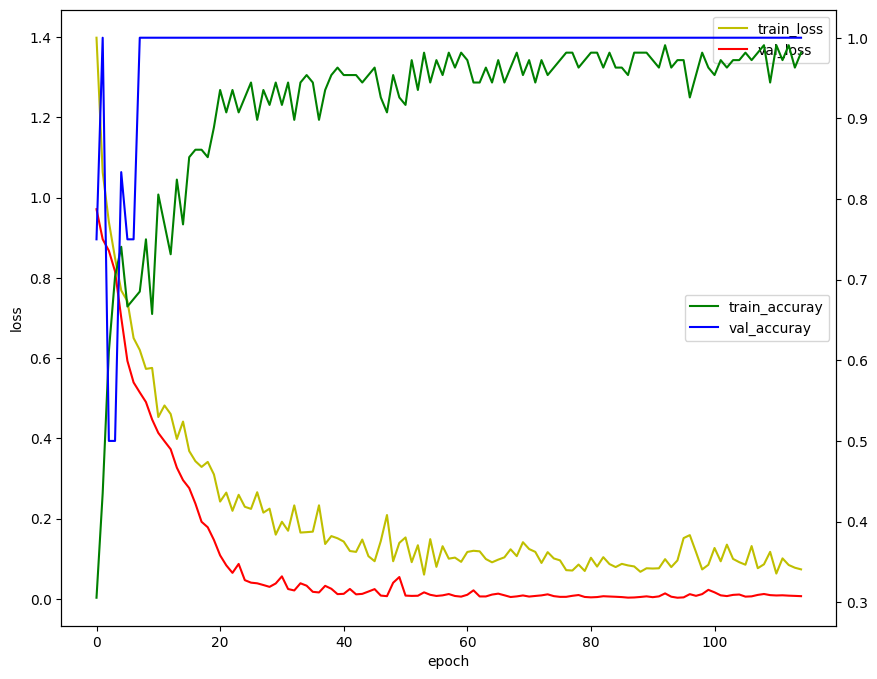

In [22]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

# 2. sklearn 이용
- 원핫인코딩을 하지 않고 라벨인코딩까지만 해야 작동

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
# 1. 데이터
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [25]:
model = MLPClassifier(
    hidden_layer_sizes=(64, 128, 50), #hidden layer의 units 수
    activation='relu',
    solver='adam', #optimizer in tensorflow
    batch_size=40,
    max_iter=1000, # 학습최대횟수
    early_stopping=True,
    n_iter_no_change=10, # EarlyStopping의 patience
    validation_fraction=0.1, #검증셋 비율
    warm_start=False # True일 경우 이전학습을 이어서 학습
)

In [26]:
model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True,
              hidden_layer_sizes=(64, 128, 50), max_iter=1000)

In [27]:
model.score(test_X, test_y)

0.9333333333333333

In [28]:
iris_X[0]

array([5.1, 3.5, 1.4, 0.2])

In [29]:
# 모델 사용
input_data = [[5.1, 3.5, 1.3, 0.2]]
model.predict(input_data)

array([0])

In [31]:
# 교차표
# test_y : 실제값
# model.predict(test_X) : 예측값
hat_y = model.predict(test_X)
pd.crosstab(test_y, hat_y, rownames=['real'], colnames=['predict'])

predict,0,1,2
real,,,
0,10,0,0
1,0,8,2
2,0,0,10


# 3. 클래스를 생성하여 모델 생성함수 사용

In [32]:
class DNNClassifier:
    @staticmethod
    def build(input_dim=4, activation='relu'):
        # 모델 구성
        model = Sequential([
            Input(input_dim),
            Dense(units=50, activation=activation),
            Dense(units=30, activation=activation),
            Dense(units=3, activation='softmax')
        ])
        # 학습 설정
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [34]:
# 1. 데이터
iris_X.shape, iris_y.shape, test_X.shape, test_y.shape
# 2. 모델
model = DNNClassifier.build(input_dim=4, activation='elu')
# 3. 모델학습
hist = model.fit(train_X, train_y, epochs=40, validation_split=0.1)

Epoch 1/40
4/4 [==============================] - 0s 41ms/step - loss: 1.4751 - accuracy: 0.0185 - val_loss: 1.2888 - val_accuracy: 0.2500
Epoch 2/40
4/4 [==============================] - 0s 9ms/step - loss: 1.3424 - accuracy: 0.2870 - val_loss: 1.1508 - val_accuracy: 0.3333
Epoch 3/40
4/4 [==============================] - 0s 9ms/step - loss: 1.2585 - accuracy: 0.2593 - val_loss: 1.0875 - val_accuracy: 0.4167
Epoch 4/40
4/4 [==============================] - 0s 9ms/step - loss: 1.1551 - accuracy: 0.3333 - val_loss: 1.0675 - val_accuracy: 0.2500
Epoch 5/40
4/4 [==============================] - 0s 9ms/step - loss: 1.0777 - accuracy: 0.3426 - val_loss: 1.0534 - val_accuracy: 0.5000
Epoch 6/40
4/4 [==============================] - 0s 9ms/step - loss: 1.0124 - accuracy: 0.6574 - val_loss: 1.0149 - val_accuracy: 0.5000
Epoch 7/40
4/4 [==============================] - 0s 9ms/step - loss: 0.9545 - accuracy: 0.6759 - val_loss: 0.9357 - val_accuracy: 0.5000
Epoch 8/40
4/4 [=================

In [35]:
# 모델평가
loss, accuracy = model.evaluate(test_X, test_y)
print(f'정확도 : {accuracy*100}%')

1/1 [==============================] - 0s 17ms/step - loss: 0.2440 - accuracy: 0.9667
정확도 : 96.66666388511658%


# 4. 함수형 API
- 병렬처리, Residual Block

``` python
# 기존 model 스타일 1
model = Sequential()
model.add(Input(input_dim))
model.add(Dense(units=50, activation=activation))
model.add(Dense(units=30, activation=activation))
model.add(Dense(units=3, activation='softmax'))
# 기존 model 스타일 2
model = Sequential([
            Input(input_dim),
            Dense(units=50, activation=activation),
            Dense(units=30, activation=activation),
            Dense(units=3, activation='softmax')
        ])
```

In [36]:
# 함수형 api 스타일 (병렬 X)
from tensorflow.keras import Model
input_ = Input(shape=(4,))
layer1 = Dense(units=50, activation='relu')(input_)
layer2 = Dense(units=30, activation='relu')(layer1)
output = Dense(units=3, activation='softmax')(layer2)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_31 (Dense)            (None, 50)                250       
                                                                 
 dense_32 (Dense)            (None, 30)                1530      
                                                                 
 dense_33 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 병렬처리 방식
from tensorflow.keras.layers import concatenate
input_ = input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
layer1 = concatenate([dense1, dense2, dense3])
output = Dense(units=3, activation='softmax')(layer1)
model  = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 50)           250         ['input_10[0][0]']               
                                                                                                  
 dense_39 (Dense)               (None, 80)           400         ['input_10[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 30)           150         ['input_10[0][0]']               
                                                                                            

In [41]:
# 리지듀얼 블럭(Residual Block) : 딥러닝에서 기울기 소실 문제로 학습이 잘 되지 않는 부분을 해결하기 위한 제안
from tensorflow.keras.layers import add
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=50, activation='relu')(dense1)
layer1 = add([dense1, dense2])
output = Dense(units=3, activation='softmax')(layer1)
model  = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_46 (Dense)               (None, 50)           250         ['input_13[0][0]']               
                                                                                                  
 dense_47 (Dense)               (None, 50)           2550        ['dense_46[0][0]']               
                                                                                                  
 add_1 (Add)                    (None, 50)           0           ['dense_46[0][0]',               
                                                                  'dense_47[0][0]']         

In [42]:
# 학습과정 설정 & 학습
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8949 - accuracy: 0.4750
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3800 - accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.6917
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.4750
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9491 - accuracy: 0.3417
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.5250
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.6833
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7329 - accuracy: 0.8750
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.7750
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.8417
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9833
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9833
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9667
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.9833
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9750
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9833
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9833
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9833
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9833
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9750
Epoch 94/100
4/4 [===============

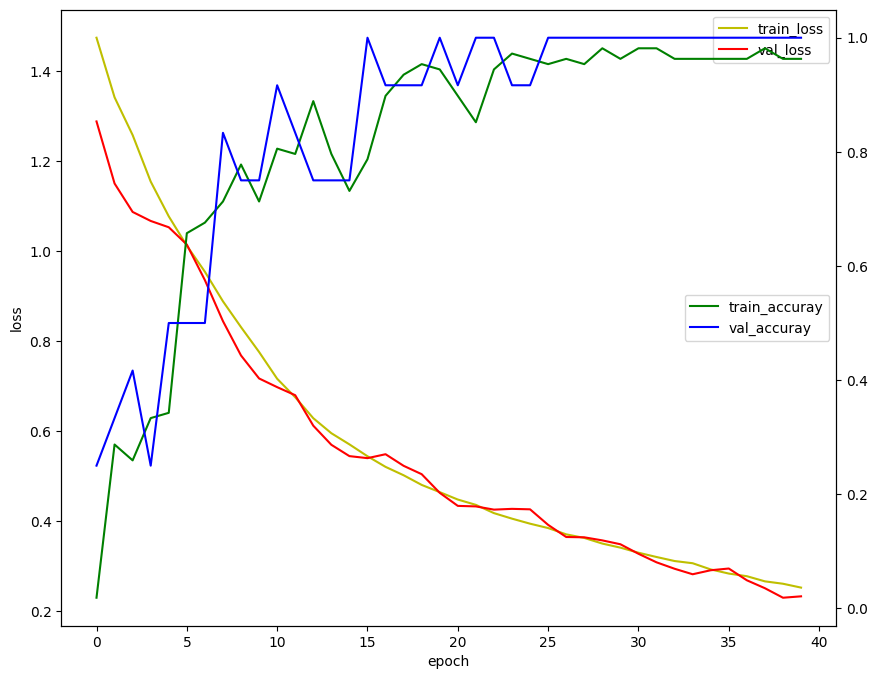

In [43]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [44]:
# 학습평가
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print('accuracy :', accuracy)

accuracy : 1.0
